In [23]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np   
import pandas as pd  

import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats
import plotly.express as px
import plotly.figure_factory as ff

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import BaggingClassifier,RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Data Loading and Overview

In [24]:
RAW_DATA_PATH = '/Users/piyush/Desktop/dsml_Portfolio/visa/data/raw/EasyVisa.csv'
df = pd.read_csv(RAW_DATA_PATH)
df.drop(['case_id'],axis=1,inplace=True)

In [25]:
df.head()

continent education_of_employee has_job_experience requires_job_training  \
0      Asia           High School                  N                     N   
1      Asia              Master's                  Y                     N   
2      Asia            Bachelor's                  N                     Y   
3      Asia            Bachelor's                  N                     N   
4    Africa              Master's                  Y                     N   

   no_of_employees  yr_of_estab region_of_employment  prevailing_wage  \
0            14513         2007                 West         592.2029   
1             2412         2002            Northeast       83425.6500   
2            44444         2008                 West      122996.8600   
3               98         1897                 West       83434.0300   
4             1082         2005                South      149907.3900   

  unit_of_wage full_time_position case_status  
0         Hour                  Y      Denied  
1         Year                  Y   Certified  
2         Year                  Y      Denied  
3         Year                  Y      Denied  
4         Year                  Y   Certified

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25480 non-null  object 
 1   education_of_employee  25480 non-null  object 
 2   has_job_experience     25480 non-null  object 
 3   requires_job_training  25480 non-null  object 
 4   no_of_employees        25480 non-null  int64  
 5   yr_of_estab            25480 non-null  int64  
 6   region_of_employment   25480 non-null  object 
 7   prevailing_wage        25480 non-null  float64
 8   unit_of_wage           25480 non-null  object 
 9   full_time_position     25480 non-null  object 
 10  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 2.1+ MB


In [27]:
df.describe(include='all')

continent education_of_employee has_job_experience  \
count      25480                 25480              25480   
unique         6                     4                  2   
top         Asia            Bachelor's                  Y   
freq       16861                 10234              14802   
mean         NaN                   NaN                NaN   
std          NaN                   NaN                NaN   
min          NaN                   NaN                NaN   
25%          NaN                   NaN                NaN   
50%          NaN                   NaN                NaN   
75%          NaN                   NaN                NaN   
max          NaN                   NaN                NaN   

       requires_job_training  no_of_employees   yr_of_estab  \
count                  25480     25480.000000  25480.000000   
unique                     2              NaN           NaN   
top                        N              NaN           NaN   
freq                   22525              NaN           NaN   
mean                     NaN      5667.043210   1979.409929   
std                      NaN     22877.928848     42.366929   
min                      NaN       -26.000000   1800.000000   
25%                      NaN      1022.000000   1976.000000   
50%                      NaN      2109.000000   1997.000000   
75%                      NaN      3504.000000   2005.000000   
max                      NaN    602069.000000   2016.000000   

       region_of_employment  prevailing_wage unit_of_wage full_time_position  \
count                 25480     25480.000000        25480              25480   
unique                    5              NaN            4                  2   
top               Northeast              NaN         Year                  Y   
freq                   7195              NaN        22962              22773   
mean                    NaN     74455.814592          NaN                NaN   
std                     NaN     52815.942327          NaN                NaN   
min                     NaN         2.136700          NaN                NaN   
25%                     NaN     34015.480000          NaN                NaN   
50%                     NaN     70308.210000          NaN                NaN   
75%                     NaN    107735.512500          NaN                NaN   
max                     NaN    319210.270000          NaN                NaN   

       case_status  
count        25480  
unique           2  
top      Certified  
freq         17018  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN

In [28]:
df.head()

continent education_of_employee has_job_experience requires_job_training  \
0      Asia           High School                  N                     N   
1      Asia              Master's                  Y                     N   
2      Asia            Bachelor's                  N                     Y   
3      Asia            Bachelor's                  N                     N   
4    Africa              Master's                  Y                     N   

   no_of_employees  yr_of_estab region_of_employment  prevailing_wage  \
0            14513         2007                 West         592.2029   
1             2412         2002            Northeast       83425.6500   
2            44444         2008                 West      122996.8600   
3               98         1897                 West       83434.0300   
4             1082         2005                South      149907.3900   

  unit_of_wage full_time_position case_status  
0         Hour                  Y      Denied  
1         Year                  Y   Certified  
2         Year                  Y      Denied  
3         Year                  Y      Denied  
4         Year                  Y   Certified

# Data Analysis

### 1. Continent wise distribution

<AxesSubplot: xlabel='continent', ylabel='count'>

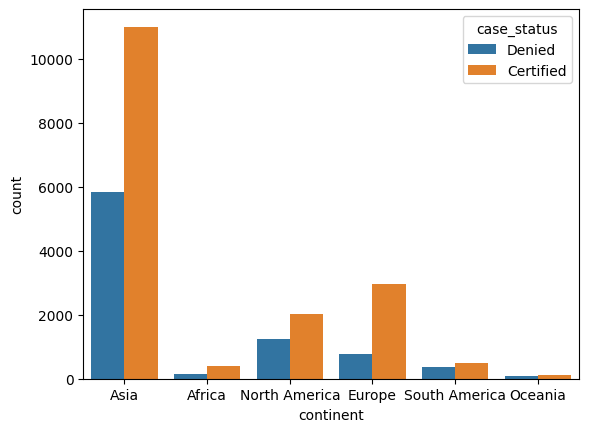

In [30]:
sns.countplot(data=df, x="continent", hue="case_status")



  Most of the visa applications are from Asia since most of the asian students migrate to USA for higher studies and jobs

### 2. Education wise distribution

<AxesSubplot: xlabel='education_of_employee', ylabel='count'>

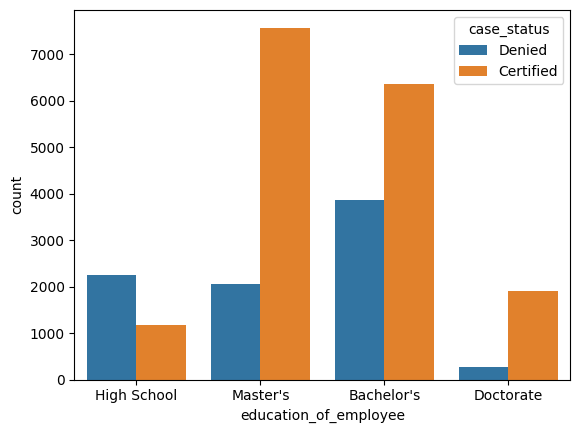

In [33]:
sns.countplot(data=df, x="education_of_employee", hue="case_status")


### 3. Education wise distribution

<AxesSubplot: xlabel='has_job_experience', ylabel='count'>

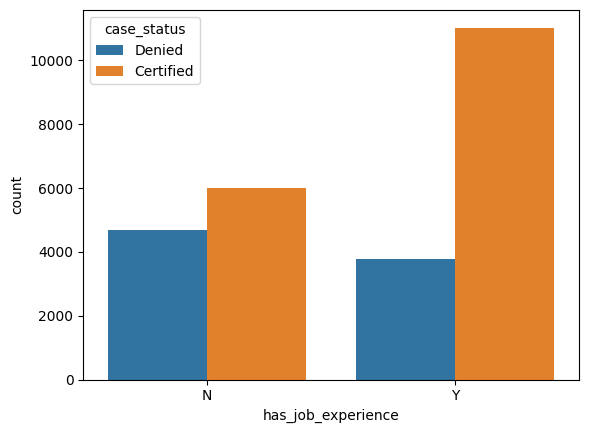

In [35]:
sns.countplot(data=df, x="has_job_experience", hue="case_status")


### 3. Education wise distribution

<AxesSubplot: xlabel='requires_job_training', ylabel='count'>

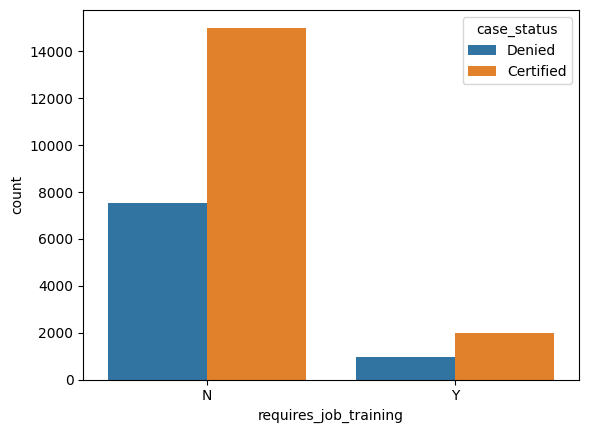

In [37]:
sns.countplot(data=df, x="requires_job_training", hue="case_status")


[Text(0, 0, '2157'), Text(0, 0, '22962'), Text(0, 0, '272'), Text(0, 0, '89')]

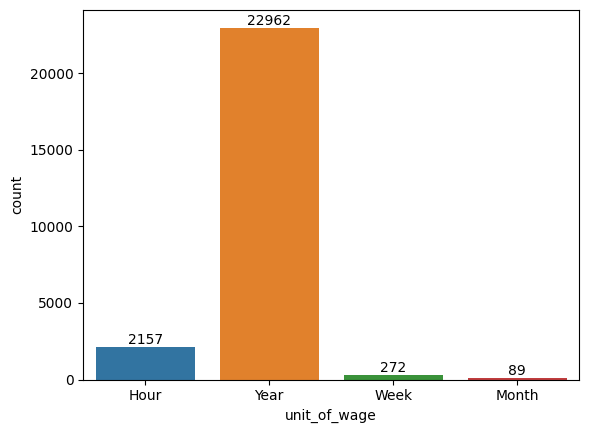

In [40]:
ax = sns.countplot(data=df, x="unit_of_wage")
ax.bar_label(ax.containers[0])


In [46]:
df

continent education_of_employee has_job_experience  \
0          Asia           High School                  N   
1          Asia              Master's                  Y   
2          Asia            Bachelor's                  N   
3          Asia            Bachelor's                  N   
4        Africa              Master's                  Y   
...         ...                   ...                ...   
25475      Asia            Bachelor's                  Y   
25476      Asia           High School                  Y   
25477      Asia              Master's                  Y   
25478      Asia              Master's                  Y   
25479      Asia            Bachelor's                  Y   

      requires_job_training  no_of_employees  yr_of_estab  \
0                         N            14513         2007   
1                         N             2412         2002   
2                         Y            44444         2008   
3                         N               98         1897   
4                         N             1082         2005   
...                     ...              ...          ...   
25475                     Y             2601         2008   
25476                     N             3274         2006   
25477                     N             1121         1910   
25478                     Y             1918         1887   
25479                     N             3195         1960   

      region_of_employment  prevailing_wage unit_of_wage full_time_position  \
0                     West         592.2029         Hour                  Y   
1                Northeast       83425.6500         Year                  Y   
2                     West      122996.8600         Year                  Y   
3                     West       83434.0300         Year                  Y   
4                    South      149907.3900         Year                  Y   
...                    ...              ...          ...                ...   
25475                South       77092.5700         Year                  Y   
25476            Northeast      279174.7900         Year                  Y   
25477                South      146298.8500         Year                  N   
25478                 West       86154.7700         Year                  Y   
25479              Midwest       70876.9100         Year                  Y   

      case_status  
0          Denied  
1       Certified  
2          Denied  
3          Denied  
4       Certified  
...           ...  
25475   Certified  
25476   Certified  
25477   Certified  
25478   Certified  
25479   Certified  

[25480 rows x 11 columns]

# no_of_employees distribution

<AxesSubplot: xlabel='no_of_employees', ylabel='Count'>

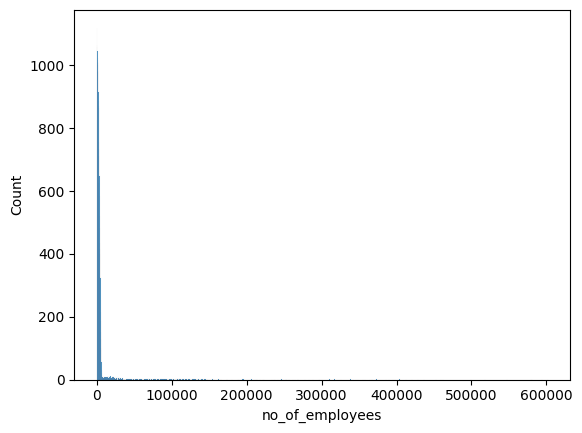

In [47]:
sns.histplot(data=df, x="no_of_employees")


highly right skewed ; we need to look in more closely by dividing the region 

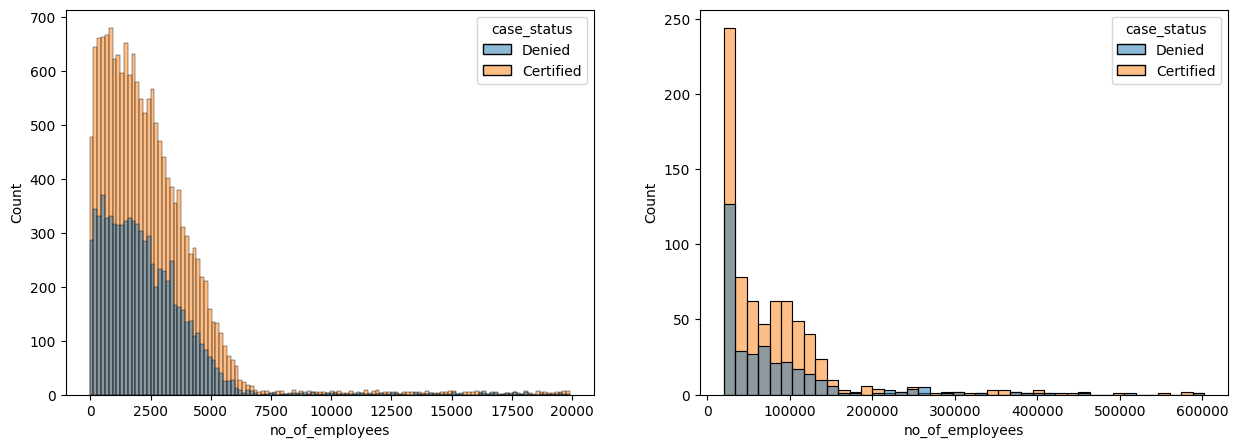

In [49]:
fig,ax=plt.subplots(1,2, figsize=(15,5))
sns.histplot(data=df[df["no_of_employees"]<20000], x="no_of_employees", hue="case_status", ax=ax[0]);
sns.histplot(data=df[df["no_of_employees"]>20000], x="no_of_employees", hue="case_status", ax=ax[1]);

We will use this to feature engineer new attributes

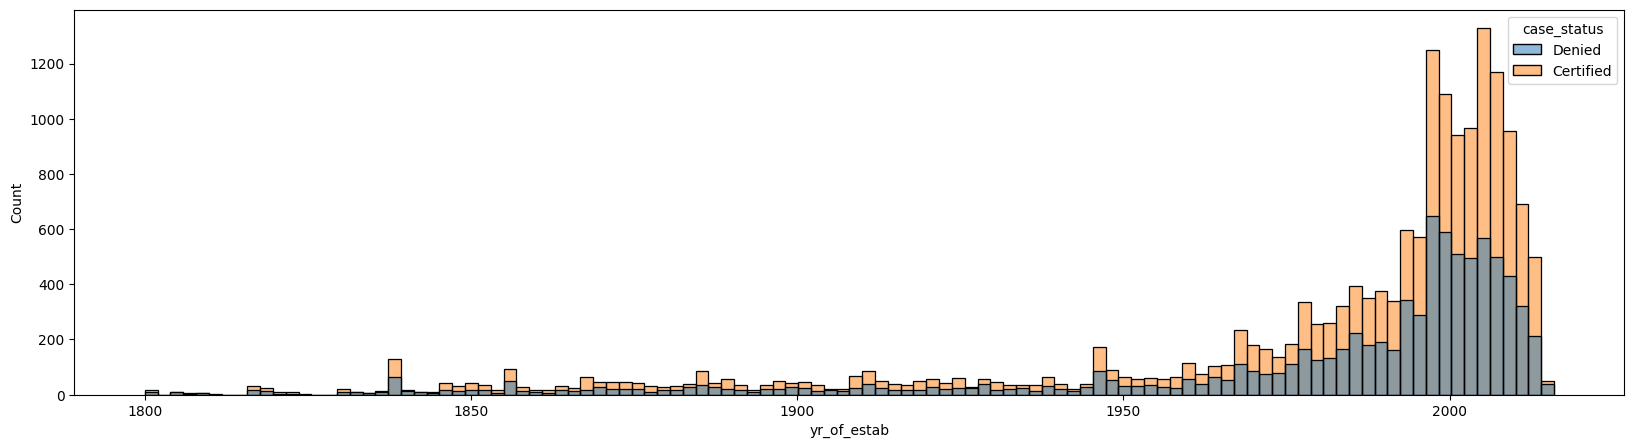

In [50]:
plt.figure(figsize=(20,5))
sns.histplot(df, x="yr_of_estab", hue="case_status");

Same goes for yr_of_estab; we will make two categories of old(< 1990) and new companies(> 1990) 

# 'prevailing_wage' 

In [51]:
histogram_boxplot(df[(df["unit_of_wage"]=="Year")], "prevailing_wage")

NameError: name 'histogram_boxplot' is not defined

In [60]:
import plotly.express as px
df_wage = df[(df["unit_of_wage"]=="Year")]
fig = px.histogram(df_wage, x="prevailing_wage",
                   marginal="box", # or violin, rug
                   hover_data=df.columns,title='Yearly income')
fig.show()

In [63]:
import plotly.express as px
df_wage = df[(df["unit_of_wage"]=="Month")]
fig = px.histogram(df_wage, x="prevailing_wage",
                   marginal="box", # or violin, rug
                   hover_data=df.columns,title='Monthly income')
fig.show()

In [64]:
import plotly.express as px
df_wage = df[(df["unit_of_wage"]=="Week")]
fig = px.histogram(df_wage, x="prevailing_wage",
                   marginal="box", # or violin, rug
                   hover_data=df.columns,title='Weekly income')
fig.show()

In [65]:
import plotly.express as px
df_wage = df[(df["unit_of_wage"]=="Hour")]
fig = px.histogram(df_wage, x="prevailing_wage",
                   marginal="box", # or violin, rug
                   hover_data=df.columns,title='Hourly income')
fig.show()

The above plots show that that prevailing_wages is likely a yearly salary where unit_of_wage is either weekly or monthly. We wish to convert all the wages on a yearly basis. Also, we will divide the unit_of_wage into two categories :: hourly and non-hourly since most of the people in US are paid on an hourly rate basis.
